<a href="https://colab.research.google.com/github/widjohn/for_my_project/blob/master/proejct5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supervised Machine Learning Problem.


Churn modelling dataset.

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.This is data science project based on supervised machine learning,in this project I will select several machine learning algorithms.

The project is broken into phases, representing each phase in the data science project lifecycle. The phases include:

Business Understanding/
Data Collection/
Data Preparation/
Exploratory Analysis/
Modeling/







Import all relevant libraries for building our supervised machine learning algorithm

In [ ]:
#import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#importing machine learning algorithms
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import KNeighborsClassifier

Importing classification metrics & algorithms for data preprocessing





In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import  cross_val_score,GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold


Data collection

In [ ]:
#loading dataset
data=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
#Check out the top five rows in the dataset to see how it looks like 
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Preparation..

Most machine learning algorithms can't work with some missing values, Data preparation is the process of
transforming raw data into a form that is more appropriate for modeling. It may be the most
important, most time consuming, and yet least discussed area of a predictive modeling machine
learning project. Data preparation is relatively straightforward in principle, although there
is a suite of high-level classes of techniques, each with a range of dierent algorithms, and
each appropriate for a specic situation with their own hyperparameters, tips, and tricks.

In [ ]:
#let's see how many rows and columns there are in our dataset
data.shape
#data.columns

(10000, 14)

This dataset contains 10 000 rows and 14 columns.


In [ ]:
#let's see if there are any missing value in our dataset
#let's make a copy of the original dataset to not use the original 
data_copy=data.copy()
data_copy.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#checking for Na in the dataset
data_copy.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

after running these two commands,it seems that our dataset do not contains any missing values.)

The info() method is useful to get a quick description of the data, in particular the
total number of rows, and each attribute’s type and number of non-null values

In [ ]:
#the info() method
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#we can check out the dtypes of the data
data_copy.dtypes.value_counts(normalize= True)

int64      0.642857
object     0.214286
float64    0.142857
dtype: float64

After checking out attributes' type in our dataset,i get insight that our dataset contains 64% of attributes are integers' type,21% of attrinutes are objects'type and 14% are float's type

In [ ]:
#let's see how the correlation between the attributes looks like
correlation= data_copy.corr()
correlation

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


After checking out the correlation between the attributes I can confirm that there are not any hight correlation between the attributes.

In [ ]:
#let's make a quickly stat summary
data_copy.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#let's look into the target variable  
data_copy['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

As we can see in our target variable there are two numbers 0 and 1, 0 means that customers did not churn , and one means that customers churned,I can say after checking out the target variable i can confirm that most of customers did not churn.

In [ ]:
#let's see how the correlation of the target variable looks like 
data_copy.corr()['Exited'].sort_values() 

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

There is no highest correlation between the target variable and others.

In [ ]:
#let's see how many customers that have credit card 
data_copy['HasCrCard'].value_counts(normalize= True)

1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64

After checking out the attribute HascrCard in our dataset, i get an insight that it looks like 70,55% of customers have a credit card , and only 29,45% do not have.

In [ ]:
#let's how many customers are active members
data_copy['IsActiveMember'].value_counts(normalize=True)

1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64

After checking attributes Isactivemember in our dataset, i get an insight that it looks like 51,51% of customers are active members , and 48,49% are not.

In [ ]:
#check the estimated salary
data_copy['EstimatedSalary'].max()

199992.48

In [ ]:
#let's check out the attribute Geography to see in how many countries that we have customers
data_copy['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
As we can see , we have customers in three differents countires, France, Germany and spain

As we can see,we have customers in three differents countries, France, Germany and spain.


Data Visualization.

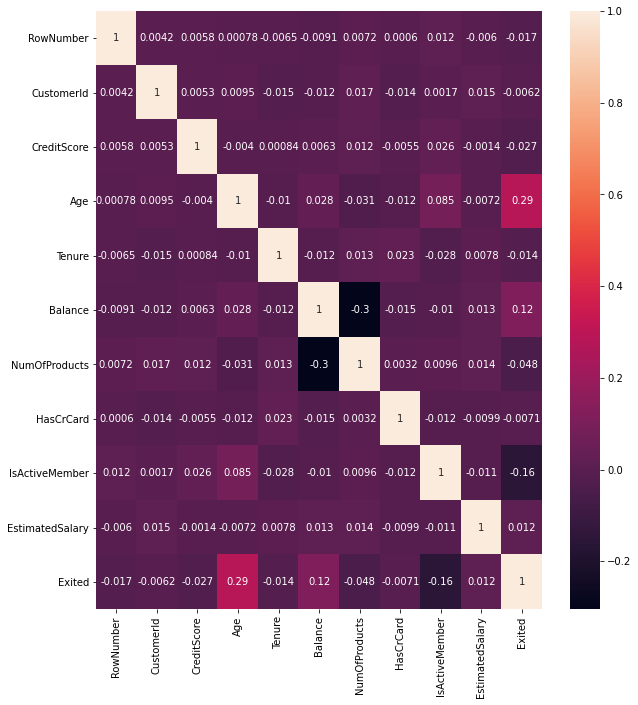

In [ ]:
#correlation matrix of our dataset
f, ax= plt.subplots(figsize=(10,11))
sns.heatmap(correlation, annot= True)

no highest correlation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


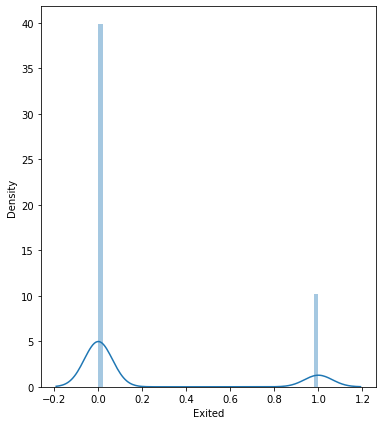

In [ ]:
#let's see how target's distribution looks like 
f,ax= plt.subplots(figsize=(6,7))
sns.distplot(data_copy.Exited);

Distribution of target variable Exited, shows us that the most of customers do not shurn.

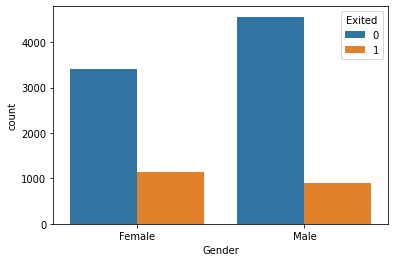

In [ ]:
#let's see how many women and men that churn
sns.countplot(x='Gender', hue='Exited', data=data_copy)

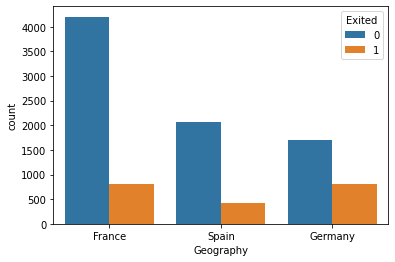

In [ ]:
#let's see how many women and men that churn
sns.countplot(x='Geography', hue='Exited', data=data_copy)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


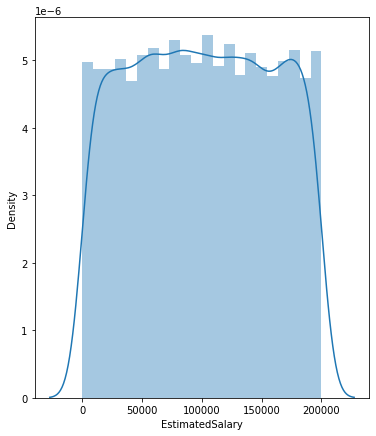

In [ ]:
#let's check estimated salary distribution looks like
f,ax= plt.subplots(figsize=(6,7))
sns.distplot(data_copy.EstimatedSalary);

In [ ]:
from scipy import stats
stats.skew(data_copy.EstimatedSalary)

0.0020850448448748848

After checking the estimated salary of customers, i get an insight that seems to be a normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


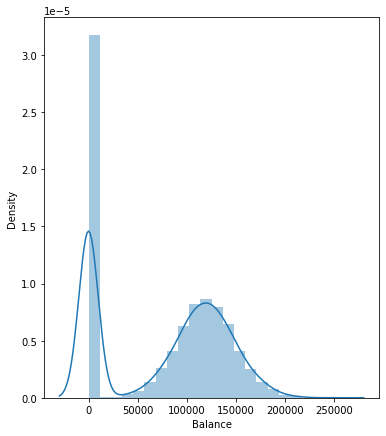

In [ ]:
f,ax= plt.subplots(figsize=(6,7))
sns.distplot(data_copy.Balance);

The distribution of the attribute Blance

In [ ]:
#calculate the skewness
from scipy import stats
stats.skew(data_copy.Balance)

-0.14108754375291138

*After* checking out the attribute balance i can say that there is a negative skewness.

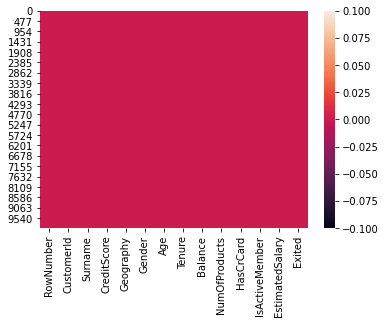

In [ ]:
#let's check out missing value on the graph
sns.heatmap(data_copy.isnull())

Identify Outliers in the dataset,Many machine learning algorithms are sensitive to the range and distribution of attribute values in the input data.Outliers in input data can skew and mislead the training process of the machine learning algorithmresulting in longer training times ,less accurate models 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


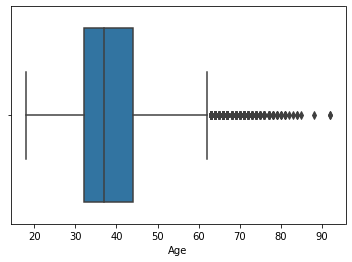

In [ ]:
#identifying outliers
sns.boxplot(data_copy['Age'])

In [ ]:
#check all outliers identified
outliers=data_copy[data_copy['Age']>60]
outliers

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
42,43,15687946,Osborne,556,France,Female,61,2,117419.35,1,1,1,94153.83,0
44,45,15684171,Bianchi,660,Spain,Female,61,5,155931.11,1,1,1,158338.39,0
58,59,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9879,9880,15669414,Pisano,486,Germany,Male,62,9,118356.89,2,1,0,168034.83,1
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0
9897,9898,15810563,Ho,678,Spain,Female,61,8,0.00,2,1,1,159938.82,0


The resume of EDA of our dataset:
* there are not any missing values in our dataset
* I can say that there are several type of variables in our dataset, like objects,integers and float.
* there is no correlation between the attributes
*when i check our target variable, i get an insight that seems most of customres do not churn
*when i checked the attribute Age, i can say that i get some outliers
*After checking the estimated salary of customers, i get an insight that seems to be a normal distribution.

In [ ]:
data_copy['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
Data preprocessing

Data Preprocessing..

we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature.

In [ ]:
#Encoding categorical feature
data_copy['Gender']=data_copy['Gender'].replace('Female', 0)
data_copy['Gender']=data_copy['Gender'].replace('Male', 1)

In [ ]:
onehot= OneHotEncoder(sparse=False)
data_copy['Geography']= onehot.fit_transform(data_copy[["Geography"]])

In [ ]:
#from sklearn.compose import make_column_transformer
#make_col= make_column_transformer( (OneHotEncoder(), ['Gender', 'Geography']), remainder='passthrough')

In [ ]:
#data_copy= make_col.fit_transform(data_copy)

In [ ]:
data_copy.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,0.0,1,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,1.0,0,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,0.0,1,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,1.0,1,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,1.0,0,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,1.0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,1.0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,1.0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,0.0,1,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,1.0,0,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
#create the input x and the target y
x=data_copy.drop(['CustomerId','Surname', 'RowNumber', 'Exited'], axis= 1).values
y=data_copy['Exited'].values

Let's split the dataset into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(x,y, test_size=0.2, random_state=40)

In [ ]:
#Let's see the splitting fo the dataset
X_train.shape,

((8000, 10),)

In [ ]:
X_test.shape

(2000, 10)

Perform feature scaling on the training set

In [ ]:
standard= StandardScaler()
X_train= standard.fit_transform(X_train)

In [ ]:
X_test= standard.transform(X_test)

In [ ]:
print(X_train)

[[ 0.23032791 -1.00601811 -1.09003844 ... -1.55337352  0.97067965
  -0.70848497]
 [ 0.54015481  0.99401789  0.91739884 ...  0.64376017 -1.030206
  -1.38762036]
 [ 0.46786187 -1.00601811  0.91739884 ... -1.55337352  0.97067965
  -0.83538323]
 ...
 [ 0.70539583 -1.00601811 -1.09003844 ...  0.64376017 -1.030206
  -1.3983009 ]
 [-0.15179195 -1.00601811 -1.09003844 ...  0.64376017 -1.030206
  -0.99538194]
 [ 0.45753431 -1.00601811 -1.09003844 ... -1.55337352  0.97067965
  -1.5031824 ]]


In [ ]:
#Create a list of columns needs apply standard scaler on
columns=['CreditScore', 'Balance','EstimatedSalary']
#X_train['columns']= standard.fit_transform(X_train['columns'])

*Model* Training.

Logistic Regression,

it is a machine learning algorithm for classification task,it is a linear model.

In [ ]:
#Fitting logistic Regression to the training set
logmodel= LogisticRegression(random_state= 40)
logmodel.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Random Forest Classifier..

Random Forest is an ensemble classifier  which uses many decision tree models to predict the result.it can be use for classification task and regression.Random forests are strong modeling technique and much more robust.

In [ ]:
#Fitting random forest to the training set
rfc= RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training the XGBoost model  using GridSearchCV hyperparamter tuning

XGBClassifier..


In [ ]:
#Define the list of parameters for the model
n_estimators= [50,100,200,]
max_depth= [2,4,6,]
learning_rate= [0.001, 0.01, 0.1]

In [ ]:
xgb= XGBClassifier()
param_grid=dict( n_estimators= n_estimators, max_depth= max_depth, learning_rate= learning_rate)


In [ ]:
kfold= StratifiedKFold(n_splits= 10,shuffle= True, random_state=40)
gridsearch= GridSearchCV(xgb,param_grid,scoring="neg_log_loss", n_jobs= -1, cv=kfold)

In [ ]:
result= gridsearch.fit(X_train,Y_train)

In [ ]:
print (result.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


LGBMclassifier..

In [ ]:
#Fitting LGBMclassifier to the training set
lgb= LGBMClassifier(n_estimators=200)
lgb.fit(X_train,Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Naive Bayes..


It is a classification technique based on Bayes Theorem with an assumption of independence among predictors

In [ ]:
#Fitting Naive to the training set
naive= GaussianNB()
naive.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Decision Tree..

In [ ]:
#Fitting Decision Tree to the training set
decision= DecisionTreeClassifier(random_state=40, max_depth=3)
decision.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

Predicting the Test set results for models

---



In [ ]:
#predicting the test set 
y_pred= logmodel.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#predicting the test set
y_pred_1= rfc.predict(X_test)
y_pred_1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#predicting the test set
y_pred_2= lgb.predict(X_test)
y_pred_2 

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#predicting the test set
y_pred_3= naive.predict(X_test)
y_pred_3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#predicting the test set
y_pred_4= gridsearch.predict(X_test)
y_pred_4

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#predicting the test set
y_pred_decision= decision.predict(X_test)
y_pred_decision

array([0, 0, 0, ..., 0, 0, 0])

Evaluating Model Performance¶


In this section, we will investigate four different algorithms, and determine which is best at modeling the data

In [ ]:
#logistic regression
accuracy_logi = accuracy_score(Y_test, y_pred )
precision_logi= precision_score(Y_test, y_pred )
recall_logi = recall_score(Y_test, y_pred )
f1_logi = f1_score(Y_test, y_pred )


In [ ]:
results_logi = pd.DataFrame([['Logistic Regression', 
accuracy_logi, precision_logi, recall_logi, f1_logi, ]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
])
results_logi = results_logi.sort_values(["Precision", 
"Recall", "F1 Score"], ascending = False)
print (results_logi)

                 Model  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression    0.8215   0.595745  0.21875      0.32


In [ ]:
#random forest
accuracy_random = accuracy_score(Y_test, y_pred_1 )
precision_random= precision_score(Y_test, y_pred_1 )
recall_random = recall_score(Y_test, y_pred_1 )
f1_random = f1_score(Y_test, y_pred_1 )



In [ ]:
model_results = pd.DataFrame(
[['Random Forest', accuracy_random, precision_random, recall_random, f1_random]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score'])
results_logi = results_logi.append(model_results, ignore_index = True)
results_logi = results_logi.sort_values(["Precision", 
"Recall", "F1 Score"], ascending = False)
print (results_logi)

                 Model  Accuracy  Precision    Recall  F1 Score
1        Random Forest    0.8685   0.737255  0.489583  0.588419
0  Logistic Regression    0.8215   0.595745  0.218750  0.320000


In [ ]:
#lightgbm
accuracy_lgb = accuracy_score(Y_test, y_pred_2 )
precision_lgb= precision_score(Y_test, y_pred_2 )
recall_lgb = recall_score(Y_test, y_pred_2 )
f1_lgb = f1_score(Y_test, y_pred_2 )

In [ ]:
model_results = pd.DataFrame(
[['Lightgbm', accuracy_lgb, precision_lgb, recall_lgb, f1_lgb]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score'])
results_logi = results_logi.append(model_results, ignore_index = True)
results_logi = results_logi.sort_values(["Precision", 
"Recall", "F1 Score"], ascending = False)
print (results_logi)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest    0.8685   0.737255  0.489583  0.588419
2             Lightgbm    0.8690   0.724265  0.513021  0.600610
1  Logistic Regression    0.8215   0.595745  0.218750  0.320000


In [ ]:
# Naives Bayes
accuracy_naive = accuracy_score(Y_test, y_pred_3 )
precision_naive= precision_score(Y_test, y_pred_3 )
recall_naive = recall_score(Y_test, y_pred_3 )
f1_naive = f1_score(Y_test, y_pred_3)

In [ ]:
model_results = pd.DataFrame(
[['Naives Bayes', accuracy_naive, precision_naive, recall_naive, f1_naive]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score'])
results_logi = results_logi.append(model_results, ignore_index = True)
results_logi = results_logi.sort_values(["Precision", 
"Recall", "F1 Score"], ascending = False)
print (results_logi)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest    0.8685   0.737255  0.489583  0.588419
1             Lightgbm    0.8690   0.724265  0.513021  0.600610
3         Naives Bayes    0.8360   0.694444  0.260417  0.378788
2  Logistic Regression    0.8215   0.595745  0.218750  0.320000


In [ ]:
accuracy_decision = accuracy_score(Y_test, y_pred_decision )
precision_decision= precision_score(Y_test, y_pred_decision )
recall_decision = recall_score(Y_test, y_pred_decision )
f1_decision = f1_score(Y_test, y_pred_decision)

In [ ]:
model_results = pd.DataFrame(
[['Decision Tree', accuracy_decision, precision_decision, recall_decision, f1_decision]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score'])
results_logi = results_logi.append(model_results, ignore_index = True)
results_logi = results_logi.sort_values(["Precision", 
"Recall", "F1 Score"], ascending = False)
print (results_logi)

                 Model  Accuracy  Precision    Recall  F1 Score
4        Decision Tree    0.8470   0.814516  0.263021  0.397638
0        Random Forest    0.8685   0.737255  0.489583  0.588419
1             Lightgbm    0.8690   0.724265  0.513021  0.600610
2         Naives Bayes    0.8360   0.694444  0.260417  0.378788
3  Logistic Regression    0.8215   0.595745  0.218750  0.320000


After evaluating the models performance of several algorithms,we can definitely conclude that lightgbm is an optimal model of choice for the given dataset as it has relatively the highest combination of precision, recall as; giving most number of correct positive predictions while minimizing the false negatives. Hence, let's try to use Lightgbm and evaluate its performance in the forthcoming sections.

Model Evaluation..


Step 16: Train & evaluate Chosen Model: Let’s fit the selected model (Lightgbm in this case) on the training dataset and evaluate the results.

In [ ]:
lgb= LGBMClassifier(n_estimators= 200)
lgb.fit(X_train,Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred_2= lgb.predict(X_test)
y_pred_2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#lightgbm
accuracy_lgb = accuracy_score(Y_test, y_pred_2 )
precision_lgb= precision_score(Y_test, y_pred_2 )
recall_lgb = recall_score(Y_test, y_pred_2 )
f1_lgb = f1_score(Y_test, y_pred_2 )

In [ ]:
print('accuracy score for Lightgbm:', accuracy_lgb)
print('precision score for Lightgbm:',precision_lgb)
print('recall score for Lightgbm:', recall_lgb) 

accuracy score for Lightgbm: 0.869
precision score for Lightgbm: 0.7242647058823529
recall score for Lightgbm: 0.5130208333333334


k-Fold Cross-Validation: 


Model evaluation is most commonly done through ‘K- fold Cross-Validation’ technique that primarily helps us to fix the variance. Variance problem occurs when we get good accuracy while running the model on a training set and a test set but then the accuracy looks different when the model is run on another test set.
So, in order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold. This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.


In [ ]:
accuracies = cross_val_score(estimator = lgb,
 X = X_train, y = Y_train, cv = 10)
print("Lightgbm Classifier average Accuracy:",accuracies.mean() )


Lightgbm Classifier average Accuracy: 0.8462499999999998


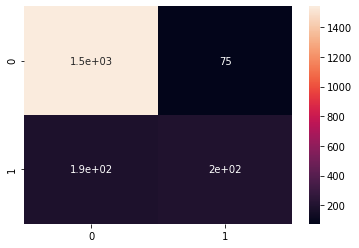

In [ ]:
#the confusion Matrix of the model
from sklearn.metrics import  confusion_matrix
cm= confusion_matrix(Y_test, y_pred_2)
cm
sns.heatmap(cm ,annot= True, cbar= True)

In [ ]:
#predicting the probability of churn for each customer
probs = lgb.predict_proba(X_test) 
probs = probs[:, 1]
print(probs)

[0.31889439 0.30868032 0.00205709 ... 0.16133903 0.01552911 0.41196383]


Model Deployment..


Lastly, deploy the model to a server using ‘joblib’ library so that we can productionize the end-to-end machine learning framework. Later we can run the model over any new dataset to predict the probability of any customer to churn in months to come.


In [ ]:
import joblib
filename = 'final_model.lgb'
i = [lgb]
joblib.dump(i,filename)

['final_model.lgb']

Conclusion...


So,after selecting several models for building our supervised machine learning,i made some prediction of each model,evaluating models performance,and making the prediction of probabilities of any customer to churn in months to come with a reasonable accuracy score of 76% to 84%.